# Projeto 3 - Prevendo o Valor da Ação do PETR4

**Grupo:** Enrico Damiani, Antonio Saporiti, João Pedro Ribeiro

**Sala:** Engenharia 2B

# Introdução:

Esse trabalho possui como objetivo prever o valor da ação PETR4. Para tanto, serão utilizados dados do valor do barril de oleo, do dolar perante o real, da ação RDSA e do Ouro dos ultimos 5 anos. Os modelos utilizarão de tecnicas de regressão para alcançar o objetivo do trabalho.

# Desenvolvimento:

* Importando as Bibliotecas Necessárias

In [4]:
import pandas as pd
import numpy as np
import re
import string
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, probplot
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
import random

* Importando os Dados do Excel

In [5]:
PETR4_raw = pd.read_excel (r'PETR4.SA .xltx')

GOLD_raw = pd.read_excel (r'Gold Futures Historical Data.xltx') 
RDS_raw = pd.read_excel (r'RDS-A.xltx') 
OIL_raw = pd.read_excel (r'Crude Oil WTI Futures Historical Data.xltx')
CRD_raw = pd.read_excel (r'USD_BRL Dados Históricos.xltx')

In [6]:
PETR4 = PETR4_raw[['Date', 'Adj Close']]

GOLD = GOLD_raw[['Date', 'Price']]
RDS = RDS_raw[['Date', 'Adj Close']]
OIL = OIL_raw[['Date', 'Price']]
CRD = CRD_raw[['Data', 'Último']]

* Juntando o DataFrame

Para PTR4:

In [7]:
PETR4_RE = PETR4.rename(columns={"Adj Close": "Valor_PETR4"})
PETR4_REDate = PETR4_RE.assign(Date = PETR4_RE.Date.values[::-1])
PETR4_F = PETR4_REDate.assign(Valor_PETR4 = PETR4_REDate.Valor_PETR4.values[::-1])

Para Gold:

In [8]:
GOLD_F = GOLD.rename(columns={"Price": "Valor_GOLD"})

Para RDS:

In [9]:
RDS_RE = RDS.rename(columns={"Adj Close": "Valor_RDS"})
RDS_REDate = RDS_RE.assign(Date = RDS_RE.Date.values[::-1])
RDS_F = RDS_REDate.assign(Valor_RDS = RDS_REDate.Valor_RDS.values[::-1])

Para OIL:

In [10]:
OIL_F = OIL.rename(columns={"Price": "Valor_OIL"})

Para CRD:

In [11]:
CRD_RE = CRD.rename(columns={"Data": "Date","Último": "Valor_CRD" })

NOVO_VALOR = []
for e in CRD_RE["Valor_CRD"]:
    NOVO_VALOR.append(e/10000)
CRD_RE['Valor_CRD'] = NOVO_VALOR

NOVA_DATA = []
for e in CRD_RE['Date']:
    Separado = e.split(".")
    Correto = Separado[2] + "-" + Separado[1] + "-" + Separado[0]
    NOVA_DATA.append(Correto)
CRD_RE['Date'] = NOVA_DATA 

CRD_F = CRD_RE

Selecionando intervalo a ser estudado e alterando o index:

In [12]:
PETR4_F["Date"] == "2014-11-10" #1240
PETR4_F["Date"] == "2019-10-31" #2
PETR4_DATE = PETR4_F.loc[2: 1240].set_index('Date')

GOLD_F["Date"] == "2014-11-10" #1321
GOLD_F["Date"] == "2019-10-31" #5
GOLD_DATE = GOLD_F.loc[5: 1321].set_index('Date')

RDS_F["Date"] == "2014-11-10" #1256
RDS_F["Date"] == "2019-10-31" #4
RDS_DATE = RDS_F.loc[4: 1256].set_index('Date')

OIL_F["Date"] == "2014-11-10" #1318
OIL_F["Date"] == "2019-10-31" #5
OIL_DATE = OIL_F.loc[5: 1318].set_index('Date')

CRD_F["Date"] == "2014-11-10" #1302
CRD_F["Date"] == "2019-10-31" #4
CRD_DATE = CRD_F.loc[4: 1302].set_index('Date')

In [13]:
U1 = GOLD_DATE.join(PETR4_DATE)
U2 = RDS_DATE.join(U1)
U3 = OIL_DATE.join(U2)
U4 = CRD_DATE.join(U3)
U5 = U4.interpolate()
DADOS = U5.sort_index(ascending=True, axis=0)

In [14]:
DADOS.head()

,Valor_CRD,Valor_OIL,Valor_RDS,Valor_GOLD,Valor_PETR4
Date,,,,,
2014-11-10,2.5528,77.40,51.181202,1251.3,13.237089
2014-11-11,2.5575,77.94,51.477970,1255.1,13.256026
2014-11-12,2.5665,77.18,50.531734,1250.4,13.360181
2014-11-13,2.5889,74.21,50.179653,1251.4,12.877283
2014-11-14,2.6018,75.82,50.891159,1275.6,12.498541


In [15]:
lista_var = []
for e in df['CALC_PETR4']:
    lista_var.append(e)
    
i = 0
lista_pos = []
while i < len(lista_var):
    if lista_var[i] > 0:
        lista_pos.append('UP')
    else:
        lista_pos.append('DOWN')
    i+=1

df['Posicao'] = lista_pos

df.head()

NameError: name 'df' is not defined

In [ ]:
plt.scatter(DADOS["Valor_CRD"], DADOS["Valor_PETR4"], alpha = 0.4)
plt.title('Valor do Dolar perante Real VS PETR4')

c = DADOS["Valor_CRD"].corr(DADOS["Valor_PETR4"])

a = DADOS["Valor_CRD"].cov(DADOS["Valor_PETR4"]) / DADOS["Valor_CRD"].var()
b = DADOS["Valor_PETR4"].mean() - a*DADOS["Valor_CRD"].mean()

plt.plot((DADOS["Valor_CRD"].min(), DADOS["Valor_CRD"].max()), (a*DADOS["Valor_CRD"].min()+b, a*DADOS["Valor_CRD"].max()+b), color='r')

print('Correlação entre valor dolar e preço PETR4: {0}'.format(c))

plt.xlabel('Preço dolar')
plt.ylabel('preço PETR4')
plt.plot()
plt.show()


Análise:

Com base nos dados acima, pode-se dizer que há uma relação entre o preço das ações cotadas do dolar com o valor das ações da PETR4

In [ ]:
plt.scatter(DADOS["Valor_OIL"], DADOS["Valor_PETR4"], alpha = 0.4)
plt.title('Oil price VS PETR4')

c = DADOS["Valor_OIL"].corr(DADOS["Valor_PETR4"])

a = DADOS["Valor_OIL"].cov(DADOS["Valor_PETR4"]) / DADOS["Valor_OIL"].var()
b = DADOS["Valor_PETR4"].mean() - a*DADOS["Valor_OIL"].mean()

plt.plot((DADOS["Valor_OIL"].min(), DADOS["Valor_OIL"].max()), (a*DADOS["Valor_OIL"].min()+b, a*DADOS["Valor_OIL"].max()+b), color='r')

print('Correlação entre valor dolar e preço PETR4: {0}'.format(c))

plt.xlabel('Preço barril óleo')
plt.ylabel('preço PETR4')

plt.plot()
plt.show()

Análise:

De acordo com os dados acima, percebe-se que existe uma considerável correlação entre o preço das ações da PETR4 e do valor do barril de óleo

In [ ]:
plt.scatter(DADOS["Valor_RDS"], DADOS["Valor_PETR4"], alpha = 0.4)
plt.title('Sell stock VS PETR4')

c = DADOS["Valor_RDS"].corr(DADOS["Valor_PETR4"])

a = DADOS["Valor_RDS"].cov(DADOS["Valor_PETR4"]) / DADOS["Valor_RDS"].var()
b = DADOS["Valor_PETR4"].mean() - a*DADOS["Valor_RDS"].mean()

plt.plot((DADOS["Valor_RDS"].min(), DADOS["Valor_RDS"].max()), (a*DADOS["Valor_RDS"].min()+b, a*DADOS["Valor_RDS"].max()+b), color='r')

print('Correlação entre valor dolar e preço PETR4: {0}'.format(c))

plt.xlabel('Preço ações Shell')
plt.ylabel('preço PETR4')

plt.plot()
plt.show()

Análise:

Com base nos dados, é possível concluir que há uma forte relação entre o preço das ações da companhia Shell e o valor das ações da PETR4

In [ ]:
plt.scatter(DADOS["Valor_GOLD"], DADOS["Valor_PETR4"], alpha = 0.4)
plt.title('Ouro VS PETR4')

c = DADOS["Valor_GOLD"].corr(DADOS["Valor_PETR4"])

a = DADOS["Valor_GOLD"].cov(DADOS["Valor_PETR4"]) / DADOS["Valor_GOLD"].var()
b = DADOS["Valor_PETR4"].mean() - a*DADOS["Valor_GOLD"].mean()

plt.plot((DADOS["Valor_GOLD"].min(), DADOS["Valor_GOLD"].max()), (a*DADOS["Valor_GOLD"].min()+b, a*DADOS["Valor_GOLD"].max()+b), color='r')

print('Correlação entre valor dolar e preço PETR4: {0}'.format(c))

plt.xlabel('Valor ouro')
plt.ylabel('preço PETR4')

plt.plot()
plt.show()

Análise:

Com base no gráfico acima, é possível visualizar a existência de uma correlação entre o valor do ouro e o preço do PETR4

Conclusão:

A partir dos gráficos plotados acima, podemos ratificar as hipóteses acerca de quais seriam os possíveis fatores que iriam influenciar o preço da ação da PETR4}

* Adicionando no DataFrame a variação percentual de cada coluna:

In [ ]:
i = 0
FAZER1 = []
while i < 1298:
    FAZER1.append((DADOS["Valor_GOLD"][i] - DADOS["Valor_GOLD"][i-1])/DADOS["Valor_GOLD"][i-1])    
    i+=1
    
i = 0
FAZER2 = []
while i < 1298:
    FAZER2.append((DADOS["Valor_RDS"][i] - DADOS["Valor_RDS"][i-1])/DADOS["Valor_RDS"][i-1])    
    i+=1
    
i = 0
FAZER3 = []
while i < 1298:
    FAZER3.append((DADOS["Valor_OIL"][i] - DADOS["Valor_OIL"][i-1])/DADOS["Valor_OIL"][i-1])    
    i+=1    

i = 0
FAZER4 = []
while i < 1298:
    FAZER4.append((DADOS["Valor_CRD"][i] - DADOS["Valor_CRD"][i-1])/DADOS["Valor_CRD"][i-1])    
    i+=1     
    
i = 0
FAZER5 = []
while i < 1298:
    FAZER5.append((DADOS["Valor_PETR4"][i+1] - DADOS["Valor_PETR4"][i])/DADOS["Valor_PETR4"][i])
    i+=1
    

DADOS_OPT = DADOS.iloc[1:1298,:]

del FAZER1[0]
del FAZER2[0]
del FAZER3[0]
del FAZER4[0]
del FAZER5[0]

    
DADOS_OPT['CALC_GOLD'] = FAZER1;
DADOS_OPT['CALC_RDS'] = FAZER2;
DADOS_OPT['CALC_OIL'] = FAZER3;
DADOS_OPT['CALC_CRD'] = FAZER4;
DADOS_OPT['CALC_PETR4'] = FAZER5;

DADOS_OPT.head(5)

In [ ]:
plt.scatter(DADOS_OPT['CALC_CRD'], DADOS_OPT['CALC_PETR4'], alpha = 0.1)
plt.title('DOLAR_REAL VS PETR4')
plt.plot()
plt.show()

Análise:



In [ ]:
plt.scatter(DADOS_OPT['CALC_OIL'], DADOS_OPT['CALC_PETR4'], alpha = 0.1)
plt.title('PETROLEO VS PETR4')
plt.plot()
plt.show()

Análise:



In [ ]:
plt.scatter(DADOS_OPT['CALC_RDS'], DADOS_OPT['CALC_PETR4'], alpha = 0.1)
plt.title('SHELL VS PETR4') 
plt.plot()
plt.show()

Análise:



In [ ]:
plt.scatter(DADOS_OPT['CALC_GOLD'], DADOS_OPT['CALC_PETR4'], alpha = 0.1)
plt.title('OURO VS PETR4')
plt.plot()
plt.show()

Análise:



# Aplicando o modelo de regressão linear

**Ajustando a Tabela para a Regressão**

In [29]:
DADOS_OPT.columns

NameError: name 'DADOS_OPT' is not defined

Definindo nossas variáveis do nosso dataset

In [30]:
df = DADOS_OPT[['Valor_CRD', 'Valor_OIL', 'Valor_RDS', 'Valor_GOLD', 'Valor_PETR4', 'CALC_GOLD', 'CALC_RDS', 'CALC_OIL', 'CALC_CRD', 'CALC_PETR4']]

NameError: name 'DADOS_OPT' is not defined

In [ ]:
df.describe()

Verificando os valores nulos

In [ ]:
np.sum(df.isnull());

Definindo nossa variável de resposta

In [ ]:
Y = df['CALC_PETR4']

Definindo os outros parâmetros. Valores brutos removidos; valores relativos mais relevantes na regressão

In [28]:
X = df[['CALC_GOLD', 'CALC_RDS', 'CALC_OIL', 'CALC_CRD']]
X.head()

NameError: name 'df' is not defined

In [ ]:
Y_valor = df['Valor_PETR4']

X_valor = df[['Valor_CRD', 'Valor_OIL', 'Valor_RDS','Valor_GOLD']]

**Separando os dados de treinamento e teste :**

Definindo o RANDOM_SEED

In [ ]:
RANDOM_SEED = 42

Criando nossas variáveis de teste e treinamento

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = RANDOM_SEED)

NameError: name 'X' is not defined

In [27]:
X_train_valor, X_test_valor, Y_train_valor, Y_test_valor = train_test_split(X_valor, Y_valor, test_size=0.2, random_state=RANDOM_SEED)

NameError: name 'X_valor' is not defined

**Início da Regressão:**

Função utilitária para fazer a regressão com constante adicionada

In [23]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

**Início da Regressão com valores absolutos:**

In [24]:
results_valor = regress(X_train_valor, Y_train_valor)
results_valor.summary()

NameError: name 'X_train_valor' is not defined

In [25]:
# Adicionando uma coluna p equivaler a função regress
X_test_valor_n = sm.add_constant(X_test_valor)

# Teste do modelo
y_pred_valor = results_valor.predict(X_test_valor_n)

NameError: name 'X_test_valor' is not defined

In [17]:
# Acurácia do modelo
lista_pred = []
lista_Y_valor = []
acertos = 0


for e in y_pred_valor:
    lista_pred.append(e)
    
for e in Y_test_valor:
    lista_Y_valor.append(e)

# 
i = 0
while i < len(lista_pred):
    a = lista_Y_valor[i]*1.05
    b = lista_Y_valor[i]*0.95
    print(a, " - ",b)
    print(lista_pred[i])
    if lista_pred[i] < a and lista_pred[i] > b:
        acertos += 1
    i += 1
        
acc = acertos/len(lista_Y_valor)


NameError: name 'y_pred_valor' is not defined

Com base na regressão linear obtida e a base de teste selecionada, a acurácia do modelo de predição foi de 10,77%

**Ajustando o coeficiente R, removendo o parâmetro do preço do barril de óleo (maior P>|t|)**

In [18]:
X_valor = df[['Valor_CRD', 'Valor_RDS','Valor_GOLD']]

NameError: name 'df' is not defined

In [19]:
X_train_valor, X_test_valor, Y_train_valor, Y_test_valor = train_test_split(X_valor, Y_valor, test_size=0.2, random_state=RANDOM_SEED)

NameError: name 'X_valor' is not defined

In [20]:
results = regress(X_train_valor, Y_train_valor)
results.summary()

NameError: name 'regress' is not defined

In [21]:
# Adicionando uma coluna p equivaler a função regress
X_test_valor_n = sm.add_constant(X_test_valor)

# Teste do modelo
y_pred_valor = results_valor.predict(X_test_valor_n)

# Acurácia do modelo
lista_pred = []
lista_Y_valor = []
acertos = 0


for e in y_pred_valor:
    lista_pred.append(e)
    
for e in Y_test_valor:
    lista_Y_valor.append(e)

# 
i = 0
while i < len(lista_pred):
    a = lista_Y_valor[i]*1.05
    b = lista_Y_valor[i]*0.95
    print(a, " - ",b)
    print(lista_pred[i])
    if lista_pred[i] < a and lista_pred[i] > b:
        acertos += 1
    i += 1
        
acc = acertos/len(lista_Y_valor)
print(acc)
acertos

NameError: name 'X_test_valor' is not defined

**Análise dos parâmetros individuais por meio da regressão**

A regressão feita acima correlaciona o preço da ação da PETR4 com outros 4 parâmetros, gerando uma correlação pentadimensional. Os coeficientes obtidos com a regressão, ao serem analisados bidimensionalmente com o preço da PETR4, se assemelham á correlação feita na primeira parte do código.

**Início da Regressão percentual:**

Usando regressão para aplicar o ajuste

In [22]:
results = regress(X_train,Y_train)
results.summary()

NameError: name 'regress' is not defined

**Ajustando R-squared Para as Variáveis que Mais Influenciam o CALC_PETR4**

* Removendo a variável com maior P>|t|

Removendo Calc_CRD

In [43]:
X1 = X_train[['CALC_RDS', 'CALC_OIL', 'CALC_CRD']]

Usando regressão para aplicar o ajuste

In [44]:
results1 = regress(X1, Y_train)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CALC_PETR4   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.804
Date:                Thu, 21 Nov 2019   Prob (F-statistic):             0.0387
Time:                        16:46:47   Log-Likelihood:                 2169.2
No. Observations:                1037   AIC:                            -4330.
Df Residuals:                    1033   BIC:                            -4311.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.465      0.642      -0.001       0.002
CALC_RDS       0.2106      0.081      2.589      0.010       0.051       0.370
CALC_OIL      -0.0934      0.049     -1.913      0.056      -0.189       0.002
CALC_CRD      -0.0815      0.092     -0.884      0.377      -0.263       0.099
==============================================================================
Omnibus:                       84.104   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.904
Skew:                           0.122   Prob(JB):                     1.99e-93
Kurtosis:                       6.134   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Análise:



**Análise da Influência dos Valores**

RDS

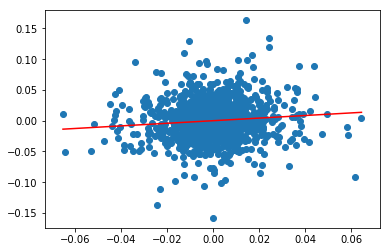

In [45]:
k = results1.params['const']
PO = results1.params['CALC_RDS']

x = DADOS_OPT['CALC_RDS']

x_v = np.linspace(x.min(), x.max(), 500)
y_v = PO*x_v

plt.plot(x_v,y_v, color="r") 
plt.scatter(x, Y)

OIL

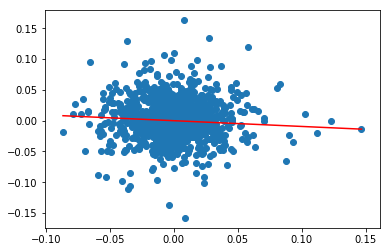

In [46]:
k = results1.params['const']
PO = results1.params['CALC_OIL']

x = DADOS_OPT['CALC_OIL']

x_v = np.linspace(x.min(), x.max(), 500)
y_v = PO*x_v

plt.plot(x_v,y_v, color="r") 
plt.scatter(x, Y)

CRD

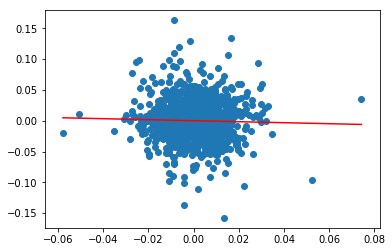

In [47]:
k = results1.params['const']
PO = results1.params['CALC_CRD']

x = DADOS_OPT['CALC_CRD']

x_v = np.linspace(x.min(), x.max(), 500)
y_v = PO*x_v

plt.plot(x_v,y_v, color="r") 
plt.scatter(x, Y)

**Treinando o Modelo**

Criando nossas variáveis preditivas

In [48]:
X_new = sm.add_constant(X_test)
y_pred = results.predict(X_new)
y_pred.head()

Date
2017-02-24   -0.004122
2016-03-09    0.003165
2017-09-19    0.003740
2018-10-22   -0.000452
2019-04-19    0.000826
dtype: float64

* Avaliando o modelo

<span style="color:red">Código que faz blablabla (Completa ae tintim) </span>

In [3]:
lista_pred = []
lista_Y_valor = []
acertos = 0


for e in y_pred:
    lista_pred.append(e)
    
for e in Y_test:
    lista_Y_valor.append(e)
    
i = 0
while i < len(lista_pred):
    a = lista_Y_valor[i]*1.5
    b = lista_Y_valor[i]*0.5
    print(a, " - ",b)
    print(lista_pred[i])
    if lista_pred[i] < a and lista_pred[i] > b:
        acertos += 1
    i += 1
        
acc = acertos/len(lista_Y_valor);

NameError: name 'y_pred' is not defined

Acertos Totais

In [50]:
print(f'Os acertos totais foram {acertos} de {len(lista_Y_valor)}')

Os acertos totais foram 8 de 260


Acerto em %

In [51]:
print(f'O acerto em % foi de {acc}%')

O acerto em % foi de 0.03076923076923077%


### Conclusão da regressão linear

Como podemos observar pelos resultados acima, o acerto de 0,03% não é satisfatótio, sendo necessários fazer mais iterações no código ou até mudar nosso modelo.

## Preparando os dados para a utilização de modelos do Scikit Learn:

In [52]:
X = DADOS_OPT.iloc[:,5:9]
y = DADOS_OPT['CALC_PETR4']

**Separando os dados em treinamento e teste, de forma aleatória:**

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Iniciando o Random Forest:**

In [54]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train.values.ravel());

**Aferindo a quantidade de acertos:**

A métrica utilizada para conferir se os valores previstos estão próximas do real poderia ser importado do próprio Scikit Learn metrics. Entretanto, para uma análise financeira, considerou-se mlehor a determinação de um intervalo, previamente fixado, que seria considerado correto. Esse intervalo, no caso, é 1% do valor futuro da ação (em ambas as direções).

In [55]:
predictionsrf = rf.predict(X_test)
b = []

for e in predictionsrf:
    b.append(e)
    
e =0
i = 0
while i < len(b):
    if b[i] <= (y_test[i] + 0.01) and b[i] >= (y_test[i] -0.01):
        e += 1
    i += 1
    
print (f'O Acerto foi de {round((e/len(y_test))*100, 2)}%.')

O Acerto foi de 31.54%.


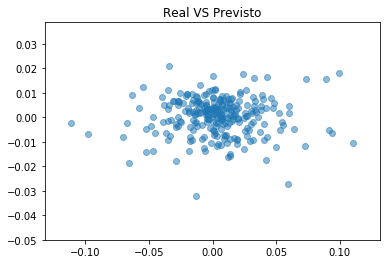

In [56]:
plt.scatter(y_test,b, alpha= 0.5)
plt.title('Real VS Previsto')
plt.plot()
plt.show()

Como pode ser observado, a predição do modelo não consegue condizer de forma precisa com a realidade, para tanto, uma iteração pode auxiliar.

**Iterrando:**

Utilizou-se os valores brutos, pois havendo uma suposta maior correlação entre os dados, imaginava-se que o resultado seria de um acerto maior. 

In [57]:
X2 = DADOS.iloc[:,0:4]
y2 = DADOS['Valor_PETR4']

Separando os dados em treinamento e teste, de forma aleatória:

In [58]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.20)
scaler = StandardScaler()
scaler.fit(X_train)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

Segundo modelo:

In [59]:
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf2.fit(X_train2, y_train2.values.ravel());

Aferindo a quantidade de acertos:

In [60]:
predictionsrf2 = rf2.predict(X_test2)
b2 = []

for e in predictionsrf2:
    b2.append(e)

e =0
i2 = 0
while i2 < len(b2):
    if b2[i2] <= (y_test2[i2] + 0.01) and b2[i2] >= (y_test2[i2] - 0.01) :
        e += 1
    i2 += 1
    
print (f'O Acerto foi de {round((e/len(y_test2))*100, 2)}%.')

O Acerto foi de 3.85%.


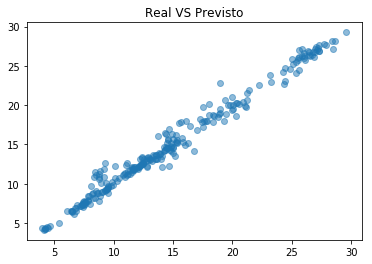

In [61]:
plt.scatter(y_test2,b2, alpha= 0.5)
plt.title('Real VS Previsto')
plt.plot()
plt.show()

Nessa segunda iteração, apesar do gráfico apresentar um suposto resultado melhor, o indice de acertos diminuiu significativamente indo para 3.85%.

    

## Implementando o modelo de Rede Neural

Para garantir que o modelo não aprenda a interpolar os dados, será utilizado como treinamento os dados de 2014 até 2016, e o restante, como teste:

In [62]:
X3_train = DADOS_OPT.iloc[:800,5:9]
y3_train = DADOS_OPT['CALC_PETR4'].iloc[:800,]
X3_test = DADOS_OPT.iloc[800:,5:9]
y3_test = DADOS_OPT['CALC_PETR4'].iloc[800:,]

In [63]:
scaler = StandardScaler()
scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)

In [1]:
mlp1 = MLPRegressor(hidden_layer_sizes = (440, 890, 36),alpha = 1e-6, max_iter = 1000, tol = 1e-6, random_state = 42, n_iter_no_change=40)
mlp1.fit(X3_train, y3_train.values.ravel())

NameError: name 'MLPRegressor' is not defined

Aferindo a quantidade de acertos:

In [65]:
predictionsmlp1 = mlp1.predict(X3_test)

b3 = []
for e in predictionsmlp1:
    b3.append(e)

e =0
i3 = 0
while i3 < len(b3):
    if b3[i3] <= (y3_test[i3] + 0.01) and b3[i3] >= (y3_test[i3] - 0.01) :
        e += 1
    i3 += 1
    
print (f'O Acerto foi de {round((e/len(y3_test))*100, 2)}%.')

O Acerto foi de 27.97%.


É possível observar que a quantidade de acertos da rede neural é menor do que a da primeira iteração do Random Forest. Para tanto, a mudança de hyperparametros é adequada. Justamente para buscar os mehores, será implementada o RandomizedSearchCV.

Iterando:

Para achar os Hyperparamtes que otimizam o modelo, será utilizado o RandomSearchcv do Scikit Learn:

In [66]:
mlp2 = MLPRegressor (max_iter=1000)

param_distributions = {'hidden_layer_sizes': [(random.randint(1,1300), random.randint(1,1300), random.randint(1,1300), random.randint(1,1300), random.randint(1,1300))],
    'activation': ['identity','logistic','tanh'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [1e-5],
    'learning_rate': ['constant','adaptive'],
    'tol' : [1e-5],
    'n_iter_no_change' : [30]    
}

g = RandomizedSearchCV(mlp2, param_distributions, n_iter=100, scoring= 'r2',cv = 10, n_jobs=None, verbose=2, random_state=42, error_score='raise-deprecating')
g.fit(X3_train, y3_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


C:\Users\Tonera\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Tonera\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Tonera\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-66-d168aa419b76>", line 13, in <module>
    g.fit(X3_train, y3_train)
  File "C:\Users\Tonera\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 722, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\Tonera\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 1515, in _run_search
    random_state=self.random_state))
  File "C:\Users\Tonera\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 711, in evaluate_candidates
    cv.split(X, y, groups)))
  File "C:\Users\Tonera\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 920, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\Tonera\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 759

KeyboardInterrupt: 

In [ ]:
# Best paramete set
print('Best parameters found:\n', g.best_params_)

# All results
means = g.cv_results_['mean_test_score']
stds = g.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, g.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
mlp3 = MLPRegressor(hidden_layer_sizes = (555, 394, 603, 256, 493),alpha = 1e-5, activation = 'logistic', solver = 'sgd', learning_rate = 'constant', max_iter = 1000, tol = 1e-5, random_state = 42, n_iter_no_change=20)
mlp3.fit(X3_train, y3_train.values.ravel()) 

Aferindo a quantidade de acertos:

In [ ]:
predictionsmlp3 = mlp3.predict(X3_test)

b4 = []
for e in predictionsmlp3:
    b4.append(e)

e =0
i4 = 0
while i4 < len(b4):
    if b4[i4] <= (y3_test[i4] + 0.01) and b4[i4] >= (y3_test[i4] - 0.01) :
        e += 1
    i4 += 1
print (f'O Acerto foi de {round((e/len(y3_test))*100, 2)}%.')  

Análise:
    
    

O modelo conseguiu prver o valor correto em 40% dos casos, um resultado considerável.

# Conclusão